In [14]:
import numpy as np

utils

In [15]:
import matplotlib.pyplot as plt


def create_dataset(N, K=2):
    N = 100  # number of points per class
    D = 2
    X = np.zeros((N * K, D))  # data matrix (each row = single example)
    y = np.zeros(N * K)  # class labels

    for j in range(K):
        ix = range(N * j, N * (j + 1))
        r = np.linspace(0, 1, N)  # radius
        t = np.linspace(j * 4, (j + 1) * 4, N) + np.random.randn(N) * 0.2
        X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
        y[ix] = j
    # lets visualize the data:
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
    plt.show()

    return X, y


def plot_contour(X, y, model, parameters):
    # plot the resulting classifier
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    points = np.c_[xx.ravel(), yy.ravel()]

    # forward prop with our trained parameters
    _, Z = model.forward(points, parameters)

    # classify into highest prob
    Z = np.argmax(Z, axis=1)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)

    # plt the points
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
    # fig.savefig('spiral_net.png')

NN

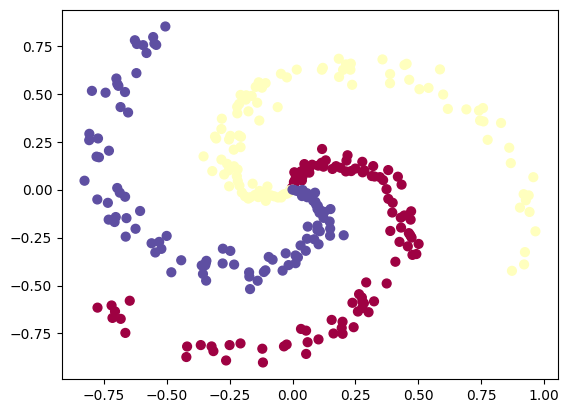

at iter 0 we have loss of 1.1654046287638302
at iter 100 we have loss of 0.8163427887339002
at iter 200 we have loss of 0.7924780610306311
at iter 300 we have loss of 0.7804903741173664
at iter 400 we have loss of 0.7771358667216581
at iter 500 we have loss of 0.7755299990120316
at iter 600 we have loss of 0.7764754810452323
at iter 700 we have loss of 0.7815852381951801
at iter 800 we have loss of 0.7920337871242582
at iter 900 we have loss of 0.8005478314952447
at iter 1000 we have loss of 0.8022403423240717
at iter 1100 we have loss of 0.8027140614733534
at iter 1200 we have loss of 0.8042374640996567
at iter 1300 we have loss of 0.8151304225383843
at iter 1400 we have loss of 0.8141947232924615
at iter 1500 we have loss of 0.8075093232014354
at iter 1600 we have loss of 0.8079975048419648
at iter 1700 we have loss of 0.8127684819542526
at iter 1800 we have loss of 0.8182474369772056
at iter 1900 we have loss of 0.8271871084368038
at iter 2000 we have loss of 0.8327760427343245
at i

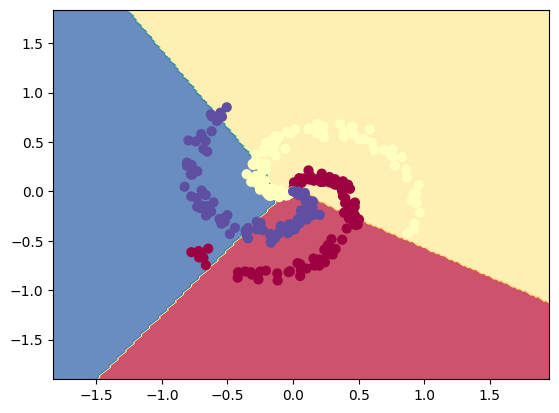

In [18]:
from re import L
class NeuralNetwork():
  def __init__(self, x, y):
    #m=tr example n=feature
    self.m, self.n = x.shape
    self.lambd = 1e-3
    self.learning_rate=0.1
    self.h1=25
    self.h2=len(np.unique(y))


  def init_weights(self, l0, l1):
    w=np.random.randn(l0,l1)*np.sqrt(2.0/l0)
    b=np.zeros((1,l1))
    return w, b


  def forward(self, x, parameters):
    W1=parameters['W1']
    W2=parameters['W2']
    B1=parameters['B1']
    B2=parameters['B2']

    a0=x
    z1=np.dot(a0, W1)+B1
    a1=np.maximum(0, z1)
    z2=np.dot(a1, W2)+B2
    scores=z2
    exp_sc=np.exp(scores)
    probs=exp_sc / np.sum(exp_sc, axis=1, keepdims=True)
    cache={
        'a0':x,
        'probs':probs,
        'a1':a1
    }
    return cache, probs


  def computeCost(self, y, probs, parameters):
    W2=parameters['W2']
    W1=parameters['W1']
    data_loss= np.sum( -np.log(probs[np.arange(self.m),y])/self.m)
    regLoss= 0.5 * self.lambd * np.sum(W1*W1) + 0.5 * self.lambd * np.sum(W2*W2)

    totalCost=data_loss+regLoss
    return totalCost

  def back(self, cache, parameters, y):
    W1=parameters['W1']
    W2=parameters['W2']
    B1=parameters['B1']
    B2=parameters['B2']
    a0=cache['a0']
    a1=cache['a1']
    probs=cache['probs']

    dz2=probs
    dz2[np.arange(self.m),y] -=1
    dz2 /= self.m
    dw2=np.dot(a1.T, dz2) + self.lambd * W2
    db2=np.sum(dz2, axis=0, keepdims=True)
    dz1=np.dot(dz2, W2.T)
    dz1=dz1 * (a1>0)
    dw1=np.dot(a0.T, dz1) + self.lambd * W1
    db1=np.sum(dz1, axis=0, keepdims=True)

    grads={
        'dw1':dw1,
        'dw2':dw2,
        'db1':db1,
        'db2':db2
    }
    return grads


  def update(self, parameters, grads):
    W1=parameters['W1']
    W2=parameters['W2']
    B1=parameters['B1']
    B2=parameters['B2']
    dw1=grads['dw1']
    dw2=grads['dw2']
    db1=grads['db1']
    db2=grads['db2']

    W2 -= self.learning_rate * dw2
    W1 -= self.learning_rate * dw1
    B2 -= self.learning_rate * db2
    W1 -= self.learning_rate * db1
    parameters={
        'W1':W1,
        'W2':W2,
        'B1':B1,
        'B2':B2
    }
    return parameters



  def main(self, x, y, num_iter=10000):
    W1, B1 = self.init_weights(self.n, self.h1)
    W2, B2 = self.init_weights(self.h1, self.h2)
    parameters={
        'W1':W1,
        'W2':W2,
        'B1':B1,
        'B2':B2
    }
    for it in range(num_iter+1):
      cache, probs = self.forward(x, parameters)
      cost = self.computeCost(y, probs, parameters)
      if it % 100 == 0:
        print(f'at iter {it} we have loss of {cost}')
      grads=self.back(cache, parameters, y)
      parameters=self.update(parameters, grads)

    return parameters


if __name__ == '__main__':
  x, y = create_dataset(N=300, K=3)
  y=y.astype(int)

  NN=NeuralNetwork(x,y)
  tr_param=NN.main(x,y)
  plot_contour(x, y, NN, tr_param)